# Ensemble Models: Random Forests and Boosting Lab

## Retail Customer Churn Model

As a junior data scientist at RetailTech Solutions, a retail analytics firm, you've been assigned to help a major e-commerce client predict customer churn. The client has noticed an increasing trend of customers abandoning their platform, despite competitive pricing and a wide product range.

Your team lead has provided you with historical customer data containing various metrics including usage patterns, customer support interactions, and account details. Your task is to build several ensemble models to predict which customers are at risk of churning, and identify the key factors driving customer departures.

The VP of Customer Experience will use your insights to develop targeted retention strategies, so both prediction accuracy and model interpretability are important. You'll apply the ensemble learning techniques you've learned, specifically Random Forest and Boosting, to address this business challenge.

## Modelling Process for Lab:
- Data Exploration
- Data Setup
- Baseline Model (Random Forest)
- Boosting Models
- Hyperparameter Tuning
- Feature Importance

## Data Overview
Data File: ecommerce_customer_data.csv

This dataset contains 15,000 customer records with 14 features and the churn target variable.

Contains columns:
- account_age_months: Number of months since customer account creation (numeric)
- avg_orders_per_month: Average number of orders placed monthly (numeric)
- avg_order_value: Average dollar amount spent per order (numeric)
- returns_rate: Proportion of items returned from total orders (numeric, 0-1)
- support_tickets_6m: Number of customer support tickets in last 6 months (integer)
- reviews_submitted: Total number of product reviews submitted (integer)
- website_visits_per_month: Average website visits per month (integer)
- cart_abandonment_rate: Proportion of shopping carts abandoned (numeric, 0-1)
- loyalty_member: Whether customer joined loyalty program (binary: 0=No, 1=Yes)
- payment_failures_12m: Number of payment failures in last 12 months (integer)
- device_type: Primary device used for shopping (ordinal: 1=Mobile, 2=Mixed, 3=Desktop)
- discount_usage_rate: Proportion of orders using discount codes (numeric, 0-1)
- days_since_last_active: Number of days since last website activity (integer)
- satisfaction_score: Customer satisfaction rating (ordinal: 1-10)
- churn: Target variable indicating customer has left (binary: 0=Retained, 1=Churned)


## Part 0: Setup - Import Libraries and Load Data

First, let's import all the necessary libraries and load the dataset.

In [1]:
# CodeGrade step0
# Run this cell without changes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

# Load the e-commerce customer data
df_ecom = pd.read_csv('ecommerce_customer_data.csv')

## Part 1: Data Exploration

In the first part here you are tasked with performing some basic EDA to investigate your data (features and target).

In [2]:
# Run this cell without changes
df_ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   account_age_months        15000 non-null  float64
 1   avg_orders_per_month      15000 non-null  float64
 2   avg_order_value           15000 non-null  float64
 3   returns_rate              15000 non-null  float64
 4   support_tickets_6m        15000 non-null  int64  
 5   reviews_submitted         15000 non-null  int64  
 6   website_visits_per_month  15000 non-null  int64  
 7   cart_abandonment_rate     15000 non-null  float64
 8   loyalty_member            15000 non-null  int64  
 9   payment_failures_12m      15000 non-null  int64  
 10  device_type               15000 non-null  int64  
 11  discount_usage_rate       15000 non-null  float64
 12  days_since_last_active    15000 non-null  int64  
 13  satisfaction_score        15000 non-null  int64  
 14  churn 

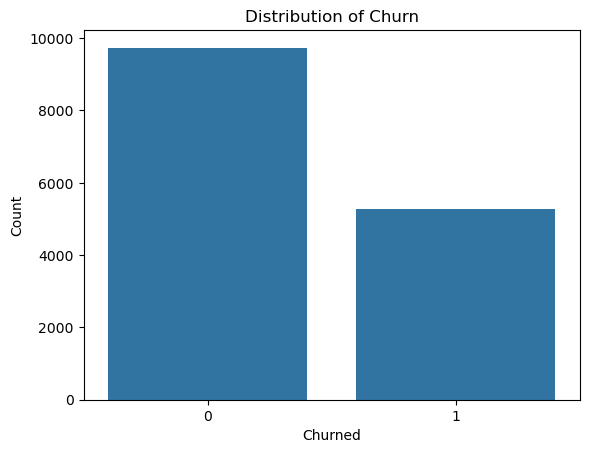

In [32]:
# CodeGrade step1
# Investigate the class distribution of churn via value_counts and visualization
churn_counts = df_ecom['churn'].value_counts()


# Visualize (use the counts object)
X = churn_counts.index
y = churn_counts.array

# Code for plot provided
sns.barplot(x=X, y=y)
plt.xlabel('Churned')
plt.ylabel('Count')
plt.title("Distribution of Churn");

In [34]:
# CodeGrade step2
# Produce a correlation matrix using pandas to visualize potential important features
# Show correlations with churn (subset the matrix to just churn column
correlations = df_ecom.corr()['churn']
correlations

account_age_months         -0.055466
avg_orders_per_month       -0.329303
avg_order_value            -0.227626
returns_rate                0.408676
support_tickets_6m          0.453958
reviews_submitted          -0.023658
website_visits_per_month   -0.070751
cart_abandonment_rate       0.047411
loyalty_member             -0.074769
payment_failures_12m        0.060467
device_type                -0.002159
discount_usage_rate         0.000945
days_since_last_active      0.128634
satisfaction_score         -0.444600
churn                       1.000000
Name: churn, dtype: float64

## Part 2: Data Setup

You need to prepare the data for modeling. The data provided is already processed and cleaned for the sake of this lab (categorical variables encoded). Seperate your data into X features and y target and then perform a train test split.
- Set random_state = 42
- Ensure an 80-20 split (train-test)

In [35]:
# CodeGrade step3
# Separate data into X and y - use all features
X = df_ecom.drop('churn', axis=1)
y = df_ecom['churn']

# Split data using sklearn, follow the standard naming conventions (X_train, X_test etc...)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Part 3: Baseline Random Forest Model
You need to instansiate and train (fit) an untuned random forest classifier and evaluate it using cross-validation. Use the default score of accuracy.
- Set random_state = 42 inside the model

In [44]:
# CodeGrade step4
# Instanstiate model and fit the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_train)
rf_model_report = classification_report(y_train, y_pred_rf, output_dict=True)

# Get training score
rf_train_score = rf_model_report['accuracy']

# Cross validation scores (don't average)
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

In [45]:
# Run this cell without changes to display results
print(f"Random Forest Training Score: {rf_train_score:.3f}")
print(f"Random Forest CV Score: {rf_cv_scores.mean():.3f}")

Random Forest Training Score: 1.000
Random Forest CV Score: 0.915


## Part 4: Boosting Models
In this section you will iterate on your modelling approach to investigate the performance of various untuned boosting models.
- Use random_state = 42 for all models

In [46]:
# CodeGrade step5
# Instantiate and fit all models
# Adaboost model
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_train)
ada_model_report = classification_report(y_train, y_pred_ada, output_dict=True)

# Gradient Boosting model
grad_model = GradientBoostingClassifier(random_state=42)
grad_model.fit(X_train, y_train)
y_pred_grad = grad_model.predict(X_train)
grad_model_report = classification_report(y_train, y_pred_grad, output_dict=True)

# XBGboost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_train)
xgb_model_report = classification_report(y_train, y_pred_xgb, output_dict=True)

# Get training scores
ada_train_score =  ada_model_report['accuracy']
grad_train_score = grad_model_report['accuracy']
xgb_train_score = xgb_model_report['accuracy']

# Cross validate all models using accuracy (don't average the scores)
ada_cv_scores = cross_val_score(ada_model, X_train, y_train, cv=5, scoring='accuracy')
grad_cv_scores = cross_val_score(grad_model, X_train, y_train, cv=5, scoring='accuracy')
xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')

In [47]:
# Run this cell without changes to dsiplay results
print(f"Training and Cross Validation Performance Comparison of Boosted Models")
print(f"Adaptive Boosting: Train - {ada_train_score:.3f}, CV - {ada_cv_scores.mean():.3f}")
print(f"Gradient Boosting: Train - {grad_train_score:.3f}, CV - {grad_cv_scores.mean():.3f}")
print(f"Extreme Gradient Boosting: Train - {xgb_train_score:.3f}, CV - {xgb_cv_scores.mean():.3f}")

Training and Cross Validation Performance Comparison of Boosted Models
Adaptive Boosting: Train - 0.920, CV - 0.916
Gradient Boosting: Train - 0.939, CV - 0.922
Extreme Gradient Boosting: Train - 0.999, CV - 0.921


## Part 5: Hyperparameter Tuning

Based on the results above you want to select the model that has the most room for improvement (is overfitting with highest train score) and attempt to optimize the model via a targeted Grid Search. Utilize the provided hyperparameters and values for your grid.
- 'learning_rate': [0.05, 0.1]
- 'n_estimators': [200, 300]
- 'max_depth': [3, 5]
- 'min_child_weight': [1, 5]
- 'scale_pos_weight': [1, 3]

NOTE: You should expect this grid search to take a minute or two to run

In [48]:
# CodeGrade step6
# Assign the model object
gs_model = xgb_model

# Create Param Grid
param_grid = {'learning_rate': [0.05, 0.1],
                'n_estimators': [200, 300],
                'max_depth': [3, 5],
                'min_child_weight': [1, 5],
                'scale_pos_weight': [1, 3]
}

# Instantiate GridSearchCV object
grid_search = GridSearchCV(gs_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search (fit)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'min_child_weight': [1, 5], 'n_estimators': [200, 300],
                         'scale_pos_weight': [1, 3]},
             scoring='accuracy')

In [49]:
# Run this cell without changes to display results
print("Best Model Results from Grid Search")
print(f"CV Score: {grid_search.best_score_:.3f}")
print(f"Best Hyperparameters: {grid_search.best_params_}")

Best Model Results from Grid Search
CV Score: 0.932
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300, 'scale_pos_weight': 1}


## Part 6: Final Model Analysis

For the sake of timing we will stop at one grid search. In practice (especially with advanced boosting models) multiple searchs are probably warranted, this grid search only touches a few of the most important hyperparameters involved. Treat the best estimator from the grid search as your final model.

In [54]:
# CodeGrade step7
# Extract final model
final_model = grid_search.best_estimator_

# Final Model training accurary
final_model.fit(X_train, y_train)
y_pred_final_train = final_model.predict(X_train)
final_model_report_train = classification_report(y_train, y_pred_final_train, output_dict=True)
final_score_train = final_model_report_train['accuracy']

# Final model testing accuracy
final_model.fit(X_test, y_test)
y_pred_final_test = final_model.predict(X_test)
final_model_report_test = classification_report(y_test, y_pred_final_test, output_dict=True)
final_score_test = final_model_report_test['accuracy']

# Produce classificaiton report
cr = classification_report(y_test, y_pred_final_test)

# Produce confusion matrix
cm = confusion_matrix(y_test, y_pred_final_test)

Final Model Evaluation
Accuracy on the Training Data: 0.959
Accuracy on the Testing Data: 0.988
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1930
           1       0.99      0.98      0.98      1070

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000

Confusion Matrix


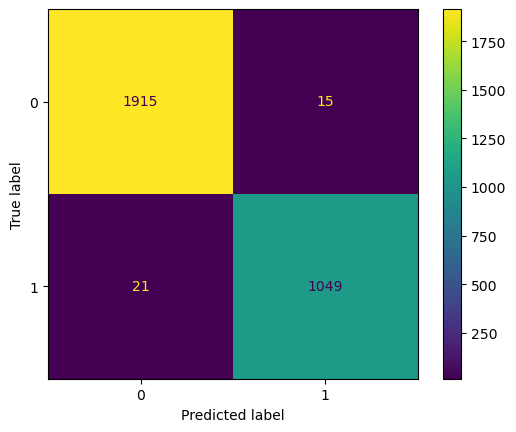

In [55]:
# Run this cell without changes to display results
print(f"Final Model Evaluation")
print(f"Accuracy on the Training Data: {final_score_train:.3f}")
print(f"Accuracy on the Testing Data: {final_score_test:.3f}")
print(f"Classification Report")
print(cr)
print(f"Confusion Matrix")
display = ConfusionMatrixDisplay(cm)
display.plot();

Your boss specifically wanted a model with high accuracy and interpretability which you have achieved! However, based on the results above and what you know about churn and business context, what might be a good alternative metric to try and optimize for? 

Select from one of the options below:
- recall
- f1_score
- precision
- roc_auc

I select recall, because this model should capture as many actual churning customers as possible. The cost of a false positive is lower than the cost of a false negative.

In [58]:
# CodeGrade step8
# Assign name of metric as string
alternative_metric = "recall_score"

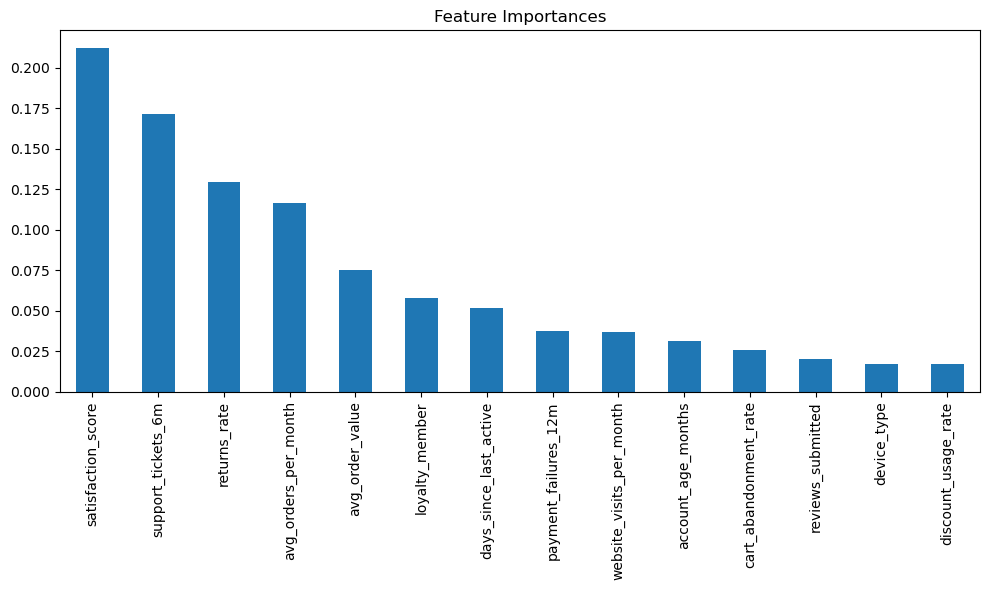

In [60]:
# CodeGrade step9
# Extract feature importance from final model
feature_importance = final_model.feature_importances_

importances = pd.Series(feature_importance, index=X_train.columns)
importances = importances.sort_values(ascending=False)
    
plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()